In [5]:
# Required libraries

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
%matplotlib inline

2.4.1


__About dataset__ : Fashion MINIST datasets, 70,000 grayscale images in 10 categories. (28x28 each image size).<p>
60,000 - train size
10,000 - test size

__MNIST DATASETS__:<br>
 tf.keras.datasets.* [<br>
    tf.keras.datasets.boston_housing <br>
    tf.keras.datasets.cifar10<br>
    tf.keras.datasets.cifar100<br>
    tf.keras.datasets.fashion_mnist<br>
    tf.keras.datasets.imdb<br>
    tf.keras.datasets.mnist<br>
    tf.keras.datasets.reuters<br>
]

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
print(f'''
Train Images: {len(train_images)}
Train Images size: {train_images.shape}
Test Images: {len(test_images)}
Test Images size: {test_images.shape}
Labels: {len(train_labels)}
''')



Train Images: 60000
Train Images size: (60000, 28, 28)
Test Images: 10000
Test Images size: (10000, 28, 28)
Labels: 60000



In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot']

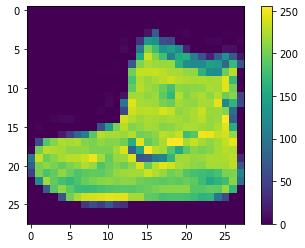

In [32]:
# preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

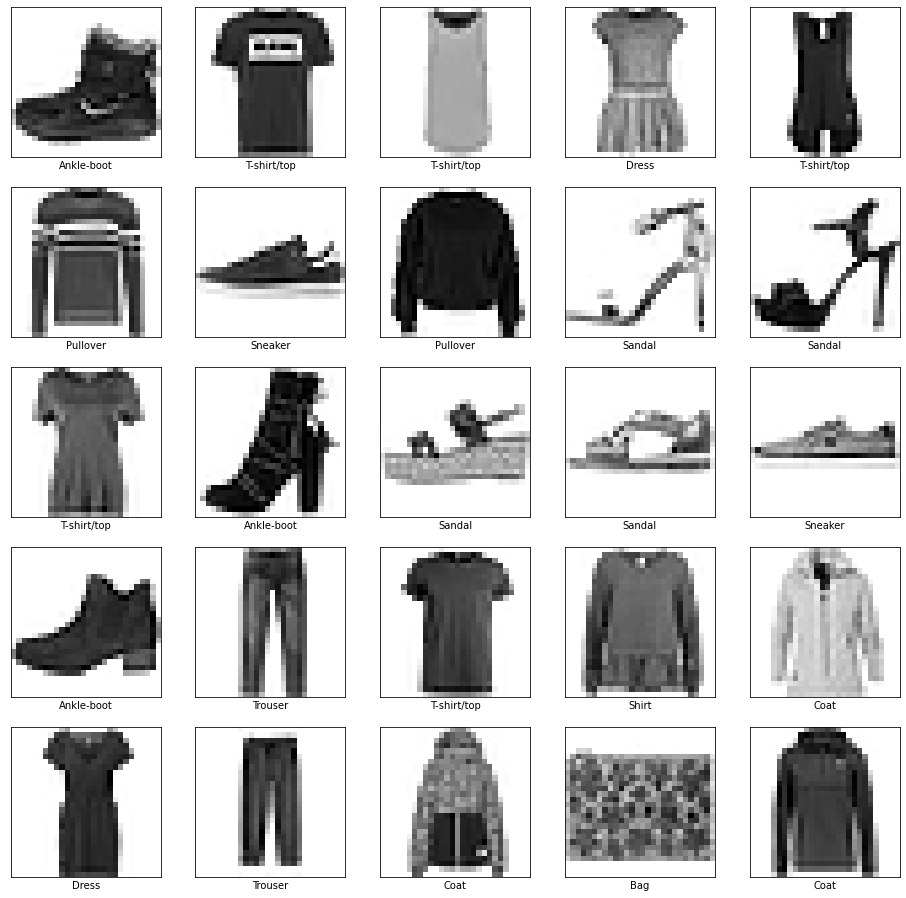

In [34]:
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [37]:
# Building the model
# a. configure the layers 
# b. compile the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
# a. Loss function - measure accuracy during training
# b. Optimizer - update the model 
# c. Metrics - monitor 

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [38]:
# Training the model

# Feed the training data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5086 - accuracy: 0.5534
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6769 - accuracy: 0.7571
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5814 - accuracy: 0.7898
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5304 - accuracy: 0.8099
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8230
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4784 - accuracy: 0.8311
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4660 - accuracy: 0.8374
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4591 - accuracy: 0.8393
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4495 - accuracy: 0.8414
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.436

In [39]:
# Evaludate model accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4609 - accuracy: 0.8340

Test accuracy: 0.8339999914169312


In [41]:
# Make prediction
# added softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_images)
predictions[0]

array([8.8037683e-07, 5.8982586e-08, 6.2392983e-06, 8.6024265e-06,
       1.1101123e-05, 1.6161340e-01, 1.2135589e-05, 2.6133114e-01,
       5.1752939e-03, 5.7184118e-01], dtype=float32)

In [45]:
np.argmax(predictions[0]),test_labels[0]

(9, 9)

In [48]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

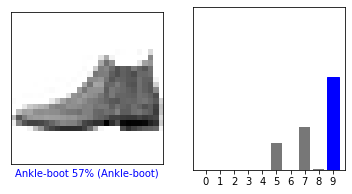

In [49]:
# Verify peridiction
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

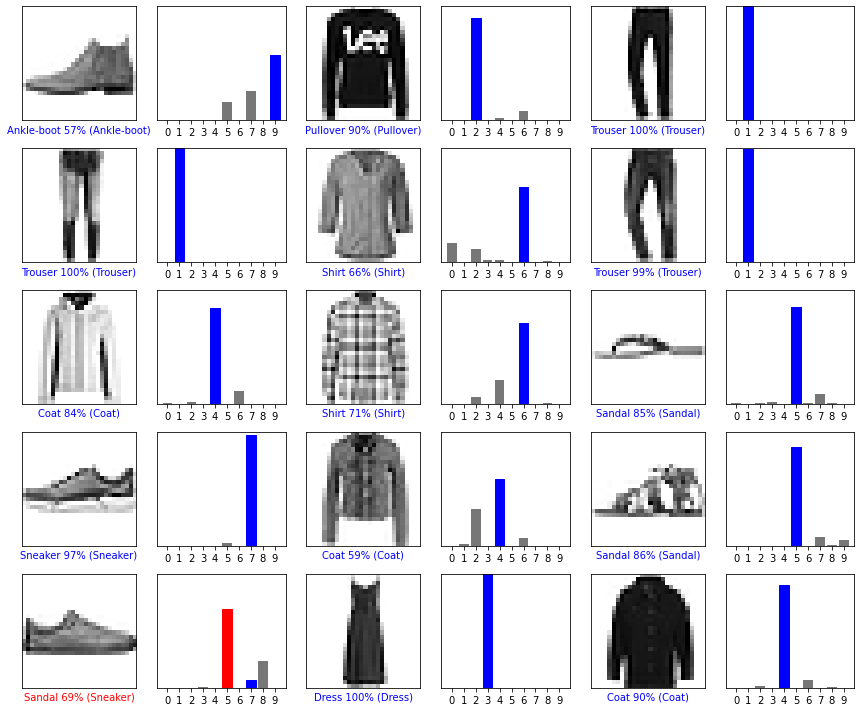

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[4.2074974e-04 1.0262684e-05 8.9716005e-01 1.2441372e-04 2.1071890e-02
  2.4945407e-10 8.1128642e-02 4.9692979e-15 8.4049207e-05 2.0058911e-11]]


2

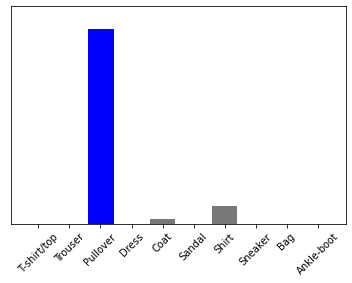

In [51]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])